In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
import xgboost as xgb


валидационная выборка

In [3]:
df_val = pd.read_table('C://Users//HP//Desktop//val.tsv', sep='\t')
df_val = pd.concat([df_val.drop('libs', 1), df_val['libs'].str.get_dummies(sep=",")], 1)
y_test = df_val["is_virus"]
df_val = df_val.drop(["is_virus", "filename"], axis = 1)
df_val

C:\Users\HP\AppData\Local\Temp\ipykernel_6596\659244357.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_val = pd.concat([df_val.drop('libs', 1), df_val['libs'].str.get_dummies(sep=",")], 1)
C:\Users\HP\AppData\Local\Temp\ipykernel_6596\659244357.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_val = pd.concat([df_val.drop('libs', 1), df_val['libs'].str.get_dummies(sep=",")], 1)


,activeds.dll,adbwinapi.dll,advapi32.dll,api-ms-win-appmodel-runtime-l1-1-0.dll,api-ms-win-appmodel-unlock-l1-1-0.dll,api-ms-win-core-apiquery-l1-1-0.dll,api-ms-win-core-com-l1-1-0.dll,api-ms-win-core-com-l1-1-1.dll,api-ms-win-core-console-l1-1-0.dll,api-ms-win-core-console-l2-1-0.dll,...,wsmsvc.dll,wsnmp32.dll,wsock32.dll,wtsapi32.dll,wttlog.dll,xgraphic32.dll,xinput1_3.dll,xmlide.dll,xmllite.dll,zlib1.dll
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
df = pd.read_table('C://Users//HP//Desktop//train.tsv', sep='\t')
df = df.drop(["filename"], axis=1)
df_onehot = pd.concat([df.drop('libs', 1), df['libs'].str.get_dummies(sep=",")], 1)
df_virus = df_onehot.loc[df_onehot['is_virus'] == 1].sum()
df_virus= df_virus[1:]
df_virus = pd.Series.to_frame(df_virus)
df_virus= df_virus.set_axis(['lib'], axis=1)
x= df_onehot.drop(["is_virus"], axis = 1)
y = df_onehot["is_virus"]

C:\Users\HP\AppData\Local\Temp\ipykernel_6596\468123024.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_onehot = pd.concat([df.drop('libs', 1), df['libs'].str.get_dummies(sep=",")], 1)
C:\Users\HP\AppData\Local\Temp\ipykernel_6596\468123024.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_onehot = pd.concat([df.drop('libs', 1), df['libs'].str.get_dummies(sep=",")], 1)


In [45]:
col_list = list(set().union(x.columns, df_val.columns))
df_val = df_val.reindex(columns=col_list, fill_value=0)
common_cols = list(set(df_val.columns).intersection(x.columns))
df_val = df_val[common_cols]
df_val =df_val.reindex(sorted(df_val.columns), axis=1)

модель случайного леса (RF)

In [23]:
forest = RandomForestClassifier()
forest.fit(x, y)

RandomForestClassifier()

In [40]:
res = forest.predict(df_val)
accuracy = accuracy_score(res, y_test)
precision = precision_score(res, y_test)
recall = recall_score(res, y_test)
f1 = f1_score(res, y_test)

In [41]:
gb = GradientBoostingClassifier(max_depth=8)
gb.fit(x,y)

GradientBoostingClassifier(max_depth=8)

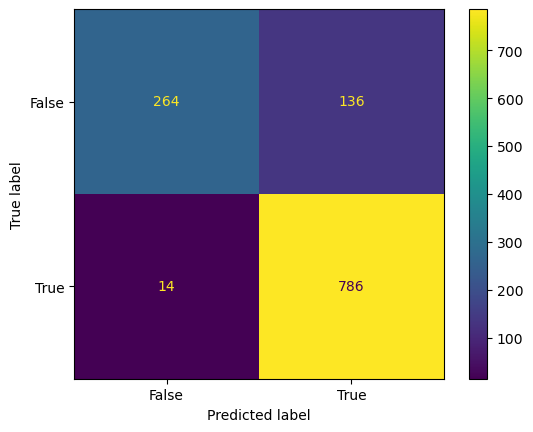

In [42]:
res_gb = gb.predict(df_val)
cm = confusion_matrix(y_test, res_gb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()


модель xgboost

In [46]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import XGBClassifier

xgb = XGBClassifier()

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(xgb, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=8) 

In [47]:
np.int = int
opt.fit(x, y)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:24:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "clf__colsample_bylevel", "clf__colsample_bynode", "clf__colsample_bytree", "clf__gamma", "clf__learning_rate", "clf__max_depth", "clf__reg_alpha", "clf__reg_lambda", "clf__subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:24:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "clf__colsample_bylevel", "clf__colsample_bynode", "clf__colsample_bytree", "clf__gamma", "clf__learning_rate", "clf__max_depth", "clf__reg_alpha", "clf__reg_lambda", "clf__subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:25:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "clf__colsample_bylevel", "clf__colsample_bynode", "clf__colsample_bytree", "clf__gamma", "clf__learning_rate", "clf__max_depth", "clf__reg_alpha", "clf__reg_lambda", "clf__subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:25:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "clf__colsample_bylevel", "clf__colsample_bynode", "clf__colsample_bytree", "clf__gamma", "clf__learning_rate", "clf__max_depth", "clf__reg_alpha", "clf__reg_lambda", "clf__subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\

BayesSearchCV(cv=3,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [56]:
opt.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              clf__colsample_bylevel=0.5331080642783614,
              clf__colsample_bynode=0.7262320733948379,
              clf__colsample_bytree=0.5362052518135637,
              clf__gamma=7.436578137661654,
              clf__learning_rate=0.0011002938624638172, clf__max_depth=5,
              clf__reg_alpha=5.016505750780453,
              clf__reg_lambda=1.964788283871643,
              clf__subsample...level=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, ...)

In [57]:
opt.score(df_val, y_test)  #roc-auc у лучших параметров xgboost

0.9181671875000001

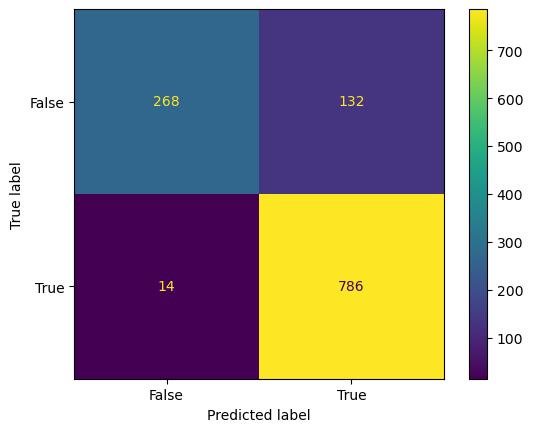

In [59]:
res_xgb = opt.predict(df_val)
cm = confusion_matrix(y_test, res_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [60]:
accuracy = accuracy_score(res_xgb, y_test)
precision = precision_score(res_xgb, y_test)
recall = recall_score(res_xgb, y_test)
f1 = f1_score(res_xgb, y_test)

 с Xgboost получили лучше результаты

In [61]:
with open('C://Users//HP//Desktop//validation.txt', 'w') as file:
    file.write('True positive: {}\n'.format(cm[0][0]))
    file.write('False positive: {}\n'.format(cm[1][0]))
    file.write('False negative: {}\n'.format(cm[0][1]))
    file.write('True negative: {}\n'.format(cm[1][1]))
    file.write('Accuracy: {:.5f}\n'.format(accuracy))
    file.write('Precision: {:.5f}\n'.format(precision))
    file.write('Recall: {:.5f}\n'.format(recall))
    file.write('F1: {:.5f}'.format(f1))